<a href="https://colab.research.google.com/github/Alisonjs0/uninassau-atividade-alunos-ml-regressao/blob/main/notebooks/Otimizacao_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
# ================================================
# 1. IMPORTAÇÕES
# ================================================
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor # Alterado de Classifier para Regressor
from scipy.stats import randint, uniform
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score # Alterado de accuracy_score para mean_squared_error, r2_score
import joblib
import os

In [3]:
# ================================================
# 2. CARREGAR O CSV
#    → Suba o arquivo no Colab antes
# ================================================

# Importar Dados
df_trained = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/training_results.csv')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/delivery_time_final.csv')
# Mostrar Dados
df

,delivery_id,distance_km,package_weight_kg,driver_experience_years,num_stops,customer_rating,fuel_cost,delivery_time_hours,wellbeing_score,delivery_type_express,...,time_of_day_noite,time_of_day_tarde,day_of_week_seg-qui,day_of_week_sexta,day_of_week_sábado,is_priority_yes,package_fragile_yes,delivery_zone_suburbana,delivery_zone_urbana,delivery_speed_kmh
0,DEL00331,0.212253,2.647201,0.091559,3.108428,1.700263,-0.126139,0.384929,-0.273771,True,...,False,True,False,False,False,False,False,False,True,0.551407
1,DEL02382,-0.465047,-0.674816,1.179863,-0.081985,1.554082,0.288737,0.005903,0.432710,False,...,False,False,True,False,False,False,True,False,True,-78.762651
2,DEL00825,1.114955,-0.868911,-0.271209,-0.879588,0.092268,0.807332,-1.690263,0.042140,True,...,False,False,True,False,False,False,True,False,True,-0.659634
3,DEL00336,-0.160864,0.698782,0.817095,-0.879588,-1.745441,-0.216893,0.615012,-0.465434,False,...,False,True,False,False,False,True,True,True,False,-0.261562
4,DEL00551,-0.149922,-0.055204,-1.359513,-0.879588,0.781409,1.377787,0.436058,-0.819789,False,...,False,False,False,False,True,False,True,False,True,-0.343811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2505,DEL02392,-1.389633,1.598339,1.179863,-0.879588,-2.664295,-0.839207,-0.506503,0.693461,False,...,False,True,False,False,True,False,False,False,False,2.743585
2506,DEL00547,-0.863330,-0.070134,0.817095,-0.081985,-1.139832,0.392456,-1.375706,1.562633,False,...,True,False,True,False,False,False,False,False,True,0.627555
2507,DEL00345,-0.351252,-1.294428,-0.633977,0.715619,0.676994,-0.489156,-0.138593,-0.026391,False,...,False,True,True,False,False,False,False,True,False,2.534429
2508,DEL01809,-1.366655,-1.895377,0.454327,-0.081985,-0.408925,0.275772,0.278224,-0.167910,False,...,False,False,False,False,True,False,False,False,True,-4.912053


In [4]:
# Assumindo que a última coluna é o alvo (y)
# Removendo a coluna 'delivery_id' que não é numérica e não deve ser usada como feature
X = df.drop(columns=['delivery_id', df.columns[-1]])
y = df.iloc[:, -1]

In [5]:
# ================================================
# 3. DIVIDIR DADOS
# ================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
# ================================================
# 4. DEFINIR O MODELO
# ================================================
model = RandomForestRegressor() # Alterado para Regressor

In [7]:
# ================================================
# 5. DEFINIR DISTRIBUIÇÕES DE HIPERPARÂMETROS
#    → RandomizedSearch usa DISTRIBUIÇÕES, não listas
# ================================================
param_dist = {
    "n_estimators": randint(50, 500),          # árvores de 50 a 500
    "max_depth": randint(3, 30),               # profundidade de 3 a 30
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 10),
    "max_features": ["sqrt", "log2"],  # 'auto' foi removido pois não é mais válido
    "bootstrap": [True, False]
}

In [8]:
# ================================================
# 6. CONFIGURAR O RANDOM SEARCH
# ================================================
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,                 # número de iterações = 50 combinações testadas
    scoring="neg_mean_squared_error", # Alterado para uma métrica de regressão
    cv=5,                      # validação cruzada 5x
    verbose=2,
    random_state=42,
    n_jobs=-1                  # usa todos os núcleos
)

In [9]:
# ================================================
# 7. TREINAR O RANDOM SEARCH
# ================================================
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c8848e45f10>,
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c8848e47620>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c8848e45a30>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c8848e46b40>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [10]:
# ================================================
# 8. EXIBIR OS MELHORES HIPERPARÂMETROS E PONTUAÇÃO
# ================================================
print("Melhores hiperparâmetros encontrados:", random_search.best_params_)
# Note que 'best_score_' será o negativo do MSE
print("Melhor pontuação (neg_mean_squared_error) no conjunto de validação:", random_search.best_score_)
print("Melhor pontuação (RMSE) no conjunto de validação:", (-random_search.best_score_)**0.5)

Melhores hiperparâmetros encontrados: {'bootstrap': False, 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 11, 'n_estimators': 237}
Melhor pontuação (neg_mean_squared_error) no conjunto de validação: -681.054820947022
Melhor pontuação (RMSE) no conjunto de validação: 26.09702705188892


In [11]:
# ================================================
# 9. AVALIAR O MELHOR MODELO NO CONJUNTO DE TESTE
# ================================================
best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE do melhor modelo no conjunto de teste: {mse:.4f}")
print(f"R2 Score do melhor modelo no conjunto de teste: {r2:.4f}")

MSE do melhor modelo no conjunto de teste: 99.3225
R2 Score do melhor modelo no conjunto de teste: 0.0495


In [15]:
results_df = pd.DataFrame(random_search.cv_results_)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.190497,0.366805,0.061866,0.025232,True,22,sqrt,8,8,171,"{'bootstrap': True, 'max_depth': 22, 'max_feat...",-1471.775741,-227.363843,-410.318606,-781.512346,-527.867852,-683.767678,433.103761,3
1,3.507994,0.453496,0.125487,0.032144,True,25,sqrt,8,5,409,"{'bootstrap': True, 'max_depth': 25, 'max_feat...",-1480.651259,-226.897657,-409.729266,-789.571967,-533.127660,-687.995562,436.497033,13
2,1.653576,0.445144,0.092530,0.039928,False,5,log2,5,3,393,"{'bootstrap': False, 'max_depth': 5, 'max_feat...",-1475.871961,-231.276520,-407.411477,-785.286105,-531.579786,-686.285170,434.047382,8
3,1.398615,0.022724,0.073765,0.004051,False,8,log2,5,2,363,"{'bootstrap': False, 'max_depth': 8, 'max_feat...",-1492.821149,-228.235786,-414.953226,-773.877430,-529.564444,-687.890407,439.579675,12
4,1.819512,0.405001,0.066523,0.018740,False,14,sqrt,1,11,237,"{'bootstrap': False, 'max_depth': 14, 'max_fea...",-1464.602324,-235.221232,-396.247612,-769.866095,-539.336842,-681.054821,429.371832,1
5,0.887817,0.078304,0.046912,0.012138,False,17,log2,3,13,104,"{'bootstrap': False, 'max_depth': 17, 'max_fea...",-1503.351672,-235.714092,-436.914848,-766.188803,-510.486781,-690.531239,440.453639,17
6,0.429720,0.015422,0.018884,0.001416,False,27,sqrt,5,8,70,"{'bootstrap': False, 'max_depth': 27, 'max_fea...",-1486.947411,-228.665084,-406.043851,-797.832702,-517.773686,-687.452547,440.418783,10
7,1.124411,0.026890,0.061236,0.005485,True,9,log2,4,15,291,"{'bootstrap': True, 'max_depth': 9, 'max_featu...",-1484.718184,-227.527831,-406.466144,-784.406091,-530.834418,-686.790534,438.188005,9
8,1.788006,0.019545,0.082173,0.000875,False,11,log2,5,3,389,"{'bootstrap': False, 'max_depth': 11, 'max_fea...",-1483.355359,-225.488645,-415.786257,-766.546570,-523.949244,-683.025215,436.707155,2
9,2.115512,0.429495,0.097286,0.020646,False,17,log2,7,13,313,"{'bootstrap': False, 'max_depth': 17, 'max_fea...",-1486.428760,-227.762789,-407.205035,-781.817224,-534.765544,-687.595870,438.277136,11


In [16]:
N = 10  # top 10
top_results = results_df.sort_values(
    by="mean_test_score",
    ascending=False
).head(N)

print(top_results[["rank_test_score", "mean_test_score", "std_test_score", "params"]])


    rank_test_score  mean_test_score  std_test_score  \
4                 1      -681.054821      429.371832   
8                 2      -683.025215      436.707155   
0                 3      -683.767678      433.103761   
13                4      -683.894775      436.421012   
19                5      -685.271232      436.847226   
15                6      -685.626618      441.193384   
17                7      -685.649575      430.308863   
2                 8      -686.285170      434.047382   
7                 9      -686.790534      438.188005   
6                10      -687.452547      440.418783   

                                               params  
4   {'bootstrap': False, 'max_depth': 14, 'max_fea...  
8   {'bootstrap': False, 'max_depth': 11, 'max_fea...  
0   {'bootstrap': True, 'max_depth': 22, 'max_feat...  
13  {'bootstrap': False, 'max_depth': 16, 'max_fea...  
19  {'bootstrap': False, 'max_depth': 11, 'max_fea...  
15  {'bootstrap': False, 'max_depth': 17, 'max_

In [19]:
# -------------------------------------------------------------------
#  ANÁLISE DE RESULTADOS DO TUNING
# -------------------------------------------------------------------

# Converter para DataFrame
results_df = pd.DataFrame(random_search.cv_results_)

# Ordenar pelas melhores médias
results_df = results_df.sort_values(by="mean_test_score", ascending=False)

# Mostrar as top 10 combinações
top10 = results_df.head(10)
top10[["rank_test_score", "mean_test_score", "std_test_score", "params"]]


,rank_test_score,mean_test_score,std_test_score,params
4,1,-681.054821,429.371832,"{'bootstrap': False, 'max_depth': 14, 'max_fea..."
8,2,-683.025215,436.707155,"{'bootstrap': False, 'max_depth': 11, 'max_fea..."
0,3,-683.767678,433.103761,"{'bootstrap': True, 'max_depth': 22, 'max_feat..."
13,4,-683.894775,436.421012,"{'bootstrap': False, 'max_depth': 16, 'max_fea..."
19,5,-685.271232,436.847226,"{'bootstrap': False, 'max_depth': 11, 'max_fea..."
15,6,-685.626618,441.193384,"{'bootstrap': False, 'max_depth': 17, 'max_fea..."
17,7,-685.649575,430.308863,"{'bootstrap': False, 'max_depth': 3, 'max_feat..."
2,8,-686.285170,434.047382,"{'bootstrap': False, 'max_depth': 5, 'max_feat..."
7,9,-686.790534,438.188005,"{'bootstrap': True, 'max_depth': 9, 'max_featu..."
6,10,-687.452547,440.418783,"{'bootstrap': False, 'max_depth': 27, 'max_fea..."


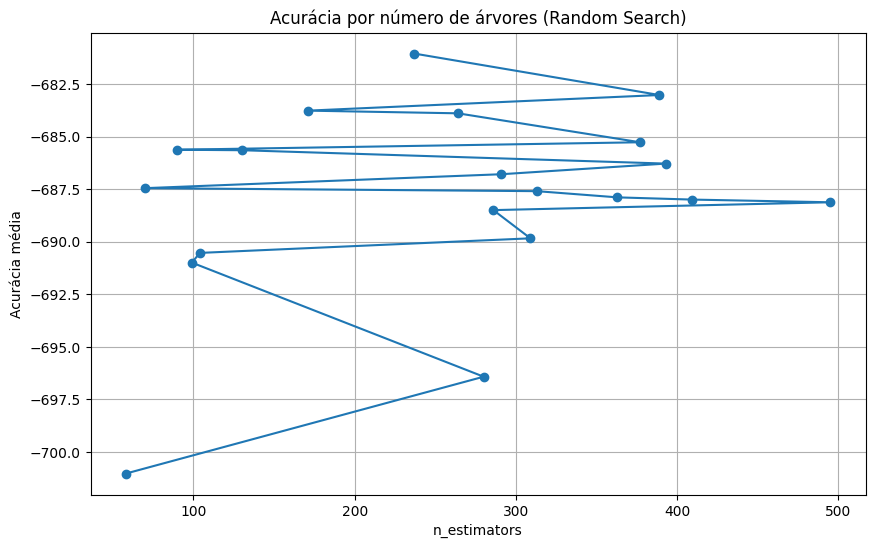

In [20]:
plt.figure(figsize=(10,6))
plt.plot(
    results_df["param_n_estimators"],
    results_df["mean_test_score"],
    marker="o"
)
plt.xlabel("n_estimators")
plt.ylabel("Acurácia média")
plt.title("Acurácia por número de árvores (Random Search)")
plt.grid()
plt.show()


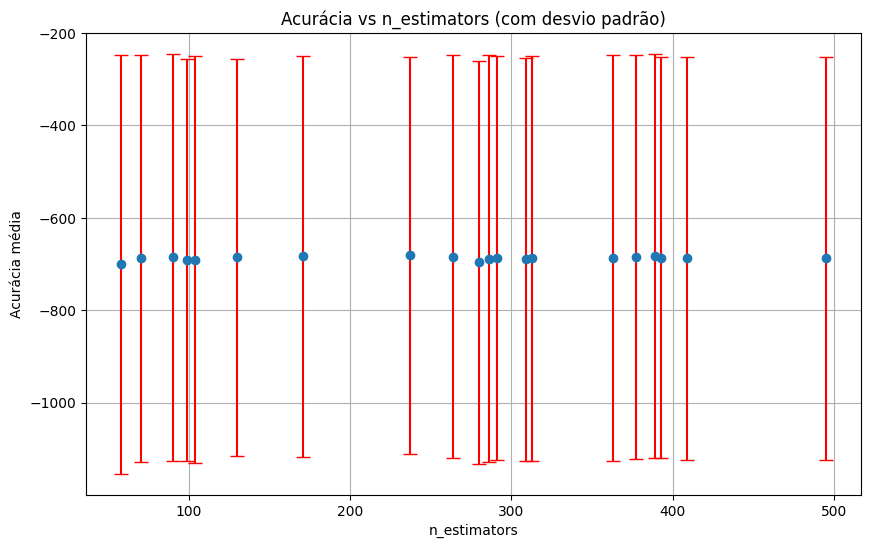

In [21]:
plt.figure(figsize=(10,6))

plt.errorbar(
    results_df["param_n_estimators"],
    results_df["mean_test_score"],
    yerr=results_df["std_test_score"],
    fmt='o',
    ecolor='red',
    capsize=5
)

plt.xlabel("n_estimators")
plt.ylabel("Acurácia média")
plt.title("Acurácia vs n_estimators (com desvio padrão)")
plt.grid()
plt.show()


Retorna um dicionário com os melhores hiperparâmetros encontrados:

In [23]:
print(random_search.best_params_)


{'bootstrap': False, 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 11, 'n_estimators': 237}


Retorna o modelo COMPLETO já treinado com os melhores hiperparâmetros dentro do processo de validação cruzada:

In [28]:
best_model = random_search.best_estimator_

Como combinar treino + validação (pd.concat)

In [26]:
X_full = pd.concat([X_train, X_test], axis=0)
y_full = pd.concat([y_train, y_test], axis=0)

TREINAMOS DE NOVO EM TODO O CONJUNTO (TREINO + VALIDAÇÃO)

In [30]:
best_params = random_search.best_params_
final_model = best_model.__class__(**best_params)
final_model.fit(X_full, y_full)

print("Modelo final treinado com sucesso!")

Modelo final treinado com sucesso!


4. Avaliação no conjunto de teste FINAL (nunca usado no tuning)

In [32]:
y_pred = final_model.predict(X_test)  # Usando o conjunto de teste inicial
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE no teste final: {mse:.4f}")
print(f"R2 Score no teste final: {r2:.4f}")

MSE no teste final: 31.3510
R2 Score no teste final: 0.7000


predições no conjunto de teste

In [33]:
y_pred = final_model.predict(X_test)


calcular MAE, RMSE e R²

In [36]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # raiz do MSE
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)

MAE : 1.7051464846765108
RMSE: 5.599196136491547
R²  : 0.6999744425083788


Por que só podemos usar o conjunto de teste UMA VEZ?

Porque:

O teste final representa o mundo real, onde o modelo encontra dados que nunca viu.

Se você olhar o teste mais de uma vez e ajustar algo no modelo, você estará vazando informação.

Isso causa overfitting ao teste, que faz o modelo parecer melhor do que realmente é.

O teste deve ser usado apenas para medir a performance final, quando tudo está pronto.

➡ Ele é o boletim final. Não pode ser refeito.

In [37]:
print("="*40)
print("⭐ AVALIAÇÃO FINAL NO CONJUNTO DE TESTE ⭐")
print("="*40)
print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²  : {r2:.4f}")
print("="*40)


⭐ AVALIAÇÃO FINAL NO CONJUNTO DE TESTE ⭐
MAE : 1.7051
RMSE: 5.5992
R²  : 0.7000


In [40]:
# Modelo ANTES = melhor encontrado na validação cruzada,
# mas NÃO treinado no conjunto completo.
model_before = random_search.best_estimator_

# Predições no teste usando o modelo "antes"
y_pred_before = model_before.predict(X_test)


mae_before = mean_absolute_error(y_test, y_pred_before)
rmse_before = np.sqrt(mean_squared_error(y_test, y_pred_before))
r2_before = r2_score(y_test, y_pred_before)


Criar um DataFrame Comparativo com Pandas

In [41]:
y_pred_after = final_model.predict(X_test)

mae_after = mean_absolute_error(y_test, y_pred_after)
rmse_after = np.sqrt(mean_squared_error(y_test, y_pred_after))
r2_after = r2_score(y_test, y_pred_after)


Criar DataFrame comparativo + melhoria percentua

In [42]:
comparacao = pd.DataFrame({
    "Métrica": ["MAE", "RMSE", "R²"],
    "Antes": [mae_before, rmse_before, r2_before],
    "Depois": [mae_after, rmse_after, r2_after]
})

# Melhoria percentual
comparacao["Melhoria (%)"] = (
    (comparacao["Antes"] - comparacao["Depois"]) / comparacao["Antes"]
) * 100

# Corrigir R² (maior é melhor)
comparacao.loc[comparacao["Métrica"] == "R²", "Melhoria (%)"] = (
    (r2_after - r2_before) / abs(r2_before)
) * 100


In [43]:
comparacao["Antes"] = comparacao["Antes"].apply(lambda x: f"{x:.4f}")
comparacao["Depois"] = comparacao["Depois"].apply(lambda x: f"{x:.4f}")
comparacao["Melhoria (%)"] = comparacao["Melhoria (%)"].apply(lambda x: f"{x:.2f}%")

print("\n📊 Comparação Antes vs Depois da Otimização:")
print(comparacao.to_string(index=False))



📊 Comparação Antes vs Depois da Otimização:
Métrica  Antes Depois Melhoria (%)
    MAE 3.2033 1.7051       46.77%
   RMSE 9.9661 5.5992       43.82%
     R² 0.0495 0.7000     1314.24%


SCATTER: Predito vs Real

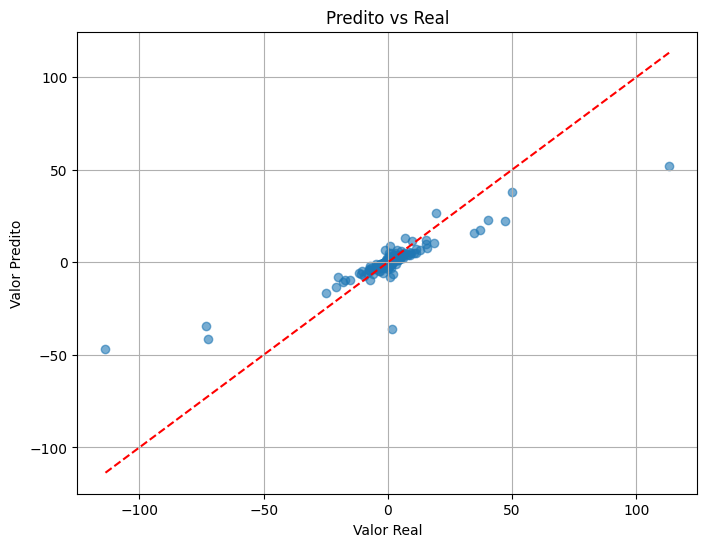

In [44]:
plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred_after, alpha=0.6)
plt.xlabel("Valor Real")
plt.ylabel("Valor Predito")
plt.title("Predito vs Real")

# Linha diagonal de referência (y = x)
min_val = min(y_test.min(), y_pred_after.min())
max_val = max(y_test.max(), y_pred_after.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

plt.grid()
plt.show()


DISTRIBUIÇÃO DOS RESÍDUOS

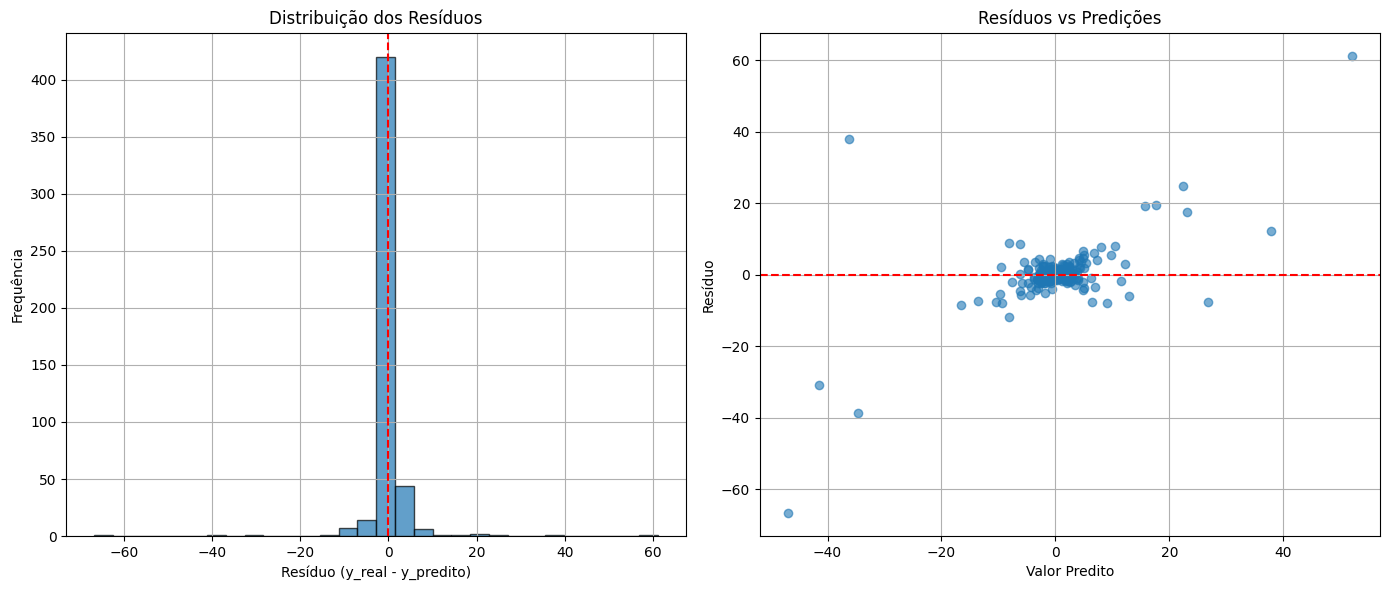

In [51]:
residuos = y_test - y_pred_after

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# -----------------------------
# 1. Histogram of residuals
# -----------------------------
axes[0].hist(residuos, bins=30, edgecolor='black', alpha=0.7)
axes[0].axvline(0, color='red', linestyle='--')
axes[0].set_title("Distribuição dos Resíduos")
axes[0].set_xlabel("Resíduo (y_real - y_predito)")
axes[0].set_ylabel("Frequência")
axes[0].grid()

# -----------------------------
# 2. Residuals vs Predictions
# -----------------------------
axes[1].scatter(y_pred_after, residuos, alpha=0.6)
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_title("Resíduos vs Predições")
axes[1].set_xlabel("Valor Predito")
axes[1].set_ylabel("Resíduo")
axes[1].grid()

plt.tight_layout()
plt.show()


ANÁLISE DOS CASOS EXTREMOS

In [52]:
# Erro absoluto
erro_abs = np.abs(residuos)

# Número de casos extremos
N = 10

# Criar DataFrame com os valores reais, previstos e erro
df_erros = pd.DataFrame({
    "y_real": y_test,
    "y_predito": y_pred_after,
    "erro_abs": erro_abs
})

# Pegar os N piores erros
piores = df_erros.nlargest(N, "erro_abs")

print("\n🔍 TOP", N, "PIORES ERROS:")
print(piores)



🔍 TOP 10 PIORES ERROS:
          y_real  y_predito   erro_abs
2142 -113.677920 -46.930320  66.747600
599   113.229303  52.015476  61.213826
1468  -73.240148 -34.572706  38.667441
2316    1.727007 -36.251715  37.978722
1374  -72.204209 -41.450571  30.753639
1948   47.207794  22.408986  24.798808
463    37.075066  17.676764  19.398302
170    34.849962  15.699250  19.150712
1173   40.415231  23.021207  17.394024
1710   49.996709  37.760468  12.236241


Salvamento do Modelo Final (com joblib)

In [54]:
# =============================================================
# 1. Criar pasta para armazenar os modelos (se não existir)
# =============================================================
os.makedirs("modelos", exist_ok=True)

# Caminho do arquivo
model_path = "modelos/modelo_final.joblib"

# =============================================================
# 2. Salvar o modelo final
# =============================================================
joblib.dump(final_model, model_path)
print(f"Modelo salvo em: {model_path}")

# =============================================================
# 3. Carregar o modelo salvo
# =============================================================
modelo_carregado = joblib.load(model_path)
print("Modelo carregado com sucesso!")

# =============================================================
# 4. Testar se o modelo carregado funciona
# =============================================================
y_pred_loaded = modelo_carregado.predict(X_test)

print("\nTeste do modelo carregado:")
print("Primeiras previsões:", y_pred_loaded[:5])
print("Primeiros valores reais:", y_test[:5].values)


Modelo salvo em: modelos/modelo_final.joblib
Modelo carregado com sucesso!

Teste do modelo carregado:
Primeiras previsões: [ 0.71190493  0.69256983 -0.06053181  1.36870904 -0.38125404]
Primeiros valores reais: [ 0.12044685 -0.46707466  0.88630096  2.06038894 -0.85349153]
